<a href="https://colab.research.google.com/github/mohyunyang/MyStudy/blob/master/Pd_prectice_tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset_names = sns.get_dataset_names()
dataset_names

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [ ]:
# diamonds = sns.load_dataset('diamonds')
tips = sns.load_dataset('tips')

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# bill 그룹끼리
# sex 끼리
# 요일 끼리
# total_bill 이 높은 순서대로
# size가 높은 순서대로

In [ ]:
df = pd.DataFrame(tips)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# tips 컬럼만
df['tip']

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
df.index

RangeIndex(start=0, stop=244, step=1)

In [ ]:
df.shape

(244, 7)

In [ ]:
# 1. 어떤 성별이 팁을 많이주는지 -> 성별끼리 그룹화, 그중 팁을 조회
# 2. size 의 크기에 따라 토탈 팁이 많아지는지
# 3. 팁을 받는 요일중 어떤 요일이 가장 많은지
# 4. 어떤 타임에 팁을 받는지

# 남자와 여자의 팁 차이

In [ ]:
# 원하는 컬럼만 선택
df[['sex', 'tip']].head()
df_s = df[['sex', 'tip']]

In [ ]:
# sex를 컬럼으로
df_s.set_index('sex', inplace=True)

In [ ]:
# 남자 그룹의 팁
print(df_s.groupby('sex').get_group('Male'))

# 남자그룹의 평균
print(df_s.groupby('sex').get_group('Male').mean())

df_s_m = df_s.groupby('sex').get_group('Male')
print()
# 남자 그룹 중 가장 높은 팁
print(df_s_m.max())

# 남자 그룹 중 가장 낮은 팁
print()
print(df_s_m.min())

       tip
sex       
Male  1.66
Male  3.50
Male  3.31
Male  4.71
Male  2.00
...    ...
Male  1.00
Male  1.17
Male  5.92
Male  2.00
Male  1.75

[157 rows x 1 columns]
tip    3.089618
dtype: float64

tip    10.0
dtype: float64

tip    1.0
dtype: float64


In [ ]:
# 여자 그룹의 팁
print(df_s.groupby('sex').get_group('Female').head())

# 여자 그룹의 팁의 평균
print()
print(df_s.groupby('sex').get_group('Female').mean())

# 여자 그룹 중 가장 높은 팁
print()
df_s_f = df_s.groupby('sex').get_group('Female')
print(df_s_f.max())

# 여자 그룹 중 가장 낮은 팁
print()
df_s_f.min()


         tip
sex         
Female  1.01
Female  3.61
Female  5.00
Female  3.02
Female  1.67

tip    2.833448
dtype: float64

tip    6.5
dtype: float64



tip    1.0
dtype: float64

산점도 그래프 (

- import matplotlib.pylab as plt

- plt.scatter( body['weight'], body['height'], label = "data")

- plt.legend(loc = "best")
- plt.xlabel('weight')
- plt.ylabel('height')
- plt.show()

In [ ]:
# 그래프 그리기
# 성별별 팁의 평균, 최대값, 최소값, 명


In [ ]:
print(df_s_m.describe())
print(df_s_f.describe())

              tip
count  157.000000
mean     3.089618
std      1.489102
min      1.000000
25%      2.000000
50%      3.000000
75%      3.760000
max     10.000000
             tip
count  87.000000
mean    2.833448
std     1.159495
min     1.000000
25%     2.000000
50%     2.750000
75%     3.500000
max     6.500000


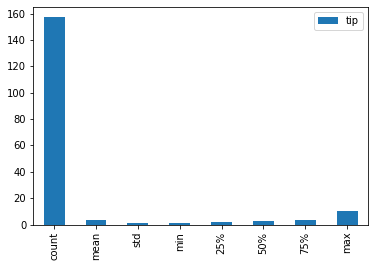

In [ ]:
# df.plot.bar(x='lang', y='val', rot=0)
df_s_m.describe().plot(kind='bar')

In [ ]:
df
df1 = df.set_index('sex')
df1
df1.sort_values(['tip','total_bill'])  # tip, total_tip 낮은 순
df_copy = df1.sort_values(['tip','total_bill']).copy()
df_copy.groupby('sex').get_group('Male')
df_c_f = df_copy.groupby('sex').get_group('Female')
df_c_m = df_copy.groupby('sex').get_group('Male')
print(df_c_f)
print(df_c_m)

        total_bill   tip smoker   day    time  size
sex                                                
Female        3.07  1.00    Yes   Sat  Dinner     1
Female        5.75  1.00    Yes   Fri  Dinner     2
Female        7.25  1.00     No   Sat  Dinner     1
Female       16.99  1.01     No   Sun  Dinner     2
Female       12.90  1.10    Yes   Sat  Dinner     2
...            ...   ...    ...   ...     ...   ...
Female       43.11  5.00    Yes  Thur   Lunch     4
Female       29.85  5.14     No   Sun  Dinner     5
Female       34.83  5.17     No  Thur   Lunch     4
Female       34.81  5.20     No   Sun  Dinner     4
Female       28.17  6.50    Yes   Sat  Dinner     3

[87 rows x 6 columns]
      total_bill    tip smoker   day    time  size
sex                                               
Male       12.60   1.00    Yes   Sat  Dinner     2
Male       32.83   1.17    Yes   Sat  Dinner     2
Male       10.07   1.25     No   Sat  Dinner     2
Male       10.51   1.25     No   Sat  Dinner  

In [ ]:
df_c_m['tip'].max()
df_c_m['tip'].min()
df_c_m['tip'].mean()

# 성별별 팁의 최대 최소 평균을 그래프로 나타내고 싶다

[]

In [ ]:

df_c_f['tip'].max()
df_c_f['tip'].min()
df_c_f['tip'].mean()

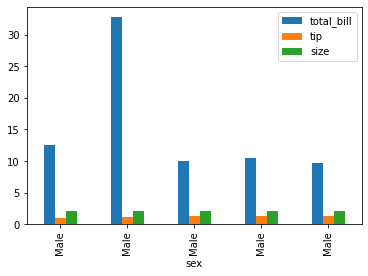

In [ ]:
df_c_m.head().plot.bar()

# 새 섹션

In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# 
# sex를 인덱스로
# 